# Empirical Project 10

## Getting Started in Python

## Preliminary Settings

Let's import the packages we'll need and also configure the settings we want:

In [64]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pingouin as pg
# from lets_plot import *

# LetsPlot.setup_html(no_js=True)

## Python Walkthrough 10.1

**Importing an Excel spreadsheet into Python**

Before loading an Excel spreadsheet into Python, it can be helpful to open it in Excel to understand the structure of the spreadsheet and the data it contains. In this case we can see that detailed descriptions of all variables are in the first tab ('Definitions and Sources'). Make sure to read the definitions for the indicators listed in Figure 10.1.

The spreadsheet contains a number of other worksheets, but the data that we need is in the tab called 'Data – June 2016'. You can see that the variable names are all in the first row and missing values are simply empty cells. We can therefore proceed to import the data into Python using the `pd.read_excel` function without any additional options.

We're going to assume here that you've donwloaded the Excel file as "GlobalFinancialDevelopmentDatabaseJune2017.xlsx", and saved it in a subfolder of your working directory called "data".

In [65]:
gfdd = pd.read_excel(
    Path("../data/GlobalFinancialDevelopmentDatabaseJune2017.xlsx"),
    sheet_name="Data - June 2016",
)
gfdd.head()

,ISO3,ISO2,IMF code,Country,Region,Income Group,Year,GFDD.AI.01,GFDD.AI.02,GFDD.AI.03,...,GFDD.OI.18,GFDD.OI.19,GFDD.OM.01,GFDD.OM.02,GFDD.OE.01,GFDD.OE.02,NY.GDP.MKTP.CD,NY.GDP.PCAP.KD,NY.GNP.MKTP.CD,SP.POP.TOTL
0,AFG,AF,512.0,Afghanistan,South Asia,Low income,1960,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,540000000.0,NaN,550000000.0,9000000.0
1,AFG,AF,512.0,Afghanistan,South Asia,Low income,1961,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,550000000.0,NaN,560000000.0,9200000.0
2,AFG,AF,512.0,Afghanistan,South Asia,Low income,1962,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,550000000.0,NaN,560000000.0,9300000.0
3,AFG,AF,512.0,Afghanistan,South Asia,Low income,1963,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,750000000.0,NaN,770000000.0,9500000.0
4,AFG,AF,512.0,Afghanistan,South Asia,Low income,1964,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,800000000.0,NaN,820000000.0,9700000.0


## Python Walkthrough 10.2

**Making box and whisker plots**

Box and whisker plots were introduced in Empirical Project 6. We can use the same process here, after ensuring that the data is in the correct format.

Some plotting libraries expects data like we have ingested to be in ‘long’ (aka tidy) format (where each row is a value for a single variable and year), whereas our data is in ‘wide’ format (each row contains a single variable but multiple years). We transform the data from wide to long format using the

So for the Depth indicators:

In [66]:
# for convenience, create a list of the indicators we're interested in:
indicators = ["private_credit", "bank_assets"]

# Rename the variables we'll be plotting
gfdd_new_names = gfdd.rename(
    columns={"GFDD.DI.01": indicators[0], "GFDD.DI.02": indicators[1]}
)

# create a long or "tidy" version of the data & drop invalid values
gfdd_long = gfdd_new_names.melt(
    id_vars=["Country", "Year"], value_vars=indicators, var_name="indicator"
).dropna()
gfdd_long

,Country,Year,indicator,value
0,Afghanistan,1960,private_credit,4.603305
1,Afghanistan,1961,private_credit,4.572875
2,Afghanistan,1962,private_credit,4.658536
3,Afghanistan,1963,private_credit,3.417160
4,Afghanistan,1964,private_credit,3.480556
...,...,...,...,...
22646,Zimbabwe,2001,bank_assets,19.494340
22647,Zimbabwe,2002,bank_assets,18.411180
22648,Zimbabwe,2003,bank_assets,26.838360
22649,Zimbabwe,2004,bank_assets,24.202580


Now we can plot it, which we'll do using the **lets-plot** package:

In [67]:
!pip install nbformat

<Figure size 1000x600 with 0 Axes>

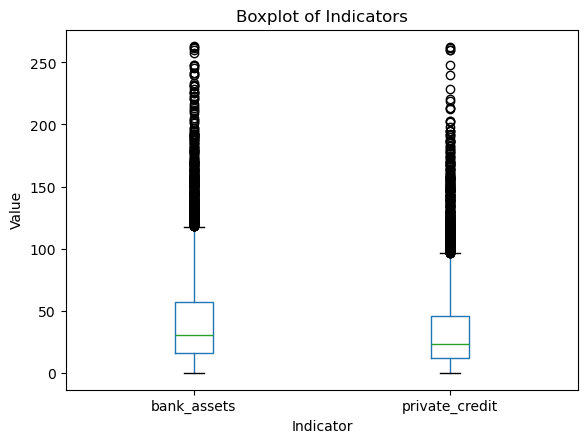

In [68]:
import matplotlib.pyplot as plt

# Create a boxplot using matplotlib
plt.figure(figsize=(10, 6))
gfdd_long.boxplot(column='value', by='indicator', grid=False)
plt.title('Boxplot of Indicators')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Indicator')
plt.ylabel('Value')
plt.show()

**Figure 10.2 Box and whisker plot for ‘Private credit by deposit money banks to GDP (%)’ (`private_credit`) and ‘Deposit money banks’ assets to GDP (%)’ (`bank_assets`).**

We could repeat the process for each topic and plot all indicators together. However, the range for the `GFDD.AI.01` variable (Bank accounts per 1,000 adults) is far larger than the other variables in this group, so it makes sense to plot this separately. We use the same process as before, as shown below.

<Figure size 1000x600 with 0 Axes>

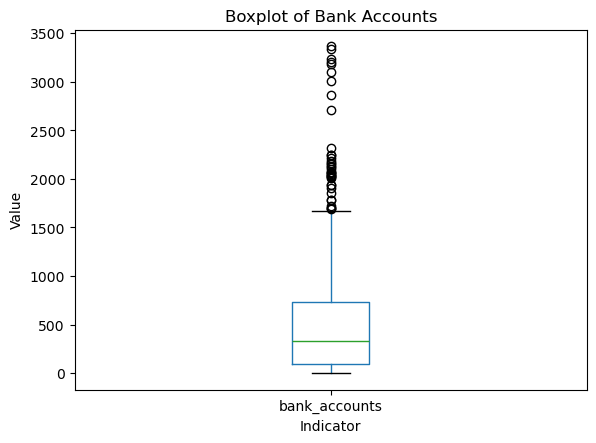

In [69]:
# for convenience, create a list of the indicators we're interested in:
indicators_big = ["bank_accounts"]

# Rename the variables we'll be plotting
gfdd_new_names = gfdd.rename(columns={"GFDD.AI.01": indicators_big[0]})

# create a long or "tidy" version of the data & drop invalid values
gfdd_long = gfdd_new_names.melt(
    id_vars=["Country", "Year"], value_vars=indicators_big, var_name="indicator"
).dropna()

# Create a boxplot using matplotlib
plt.figure(figsize=(10, 6))
gfdd_long.boxplot(column='value', by='indicator', grid=False)
plt.title('Boxplot of Bank Accounts')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Indicator')
plt.ylabel('Value')
plt.show()

Now we'd like to do this for a bunch more cases. A key principle of coding is 'DRY: Don't Repeat Yourself'. We shouldn't have to type this out multiple times, and it's more likely that something could go wrong if we do that. Instead, we're going to list all of the indicators in one go, and that's what the below code is going to do.

However, we do need a trick for this. To change the names of the variables to sensible names we will use a built-in type of object in Python called a *dictionary*. Dictionaries provide a map from one set of values to another. A simple one might look like this:

```python
fruit_dict = {
    "Jazz": "Apple",
    "Owari": "Satsuma",
    "Seto": "Satsuma",
    "Pink Lady": "Apple",
}
```

which maps varieties of fruit into types of fruit. A dictionary is super helpful here because we can use it to map the old column names to the new ones in a statement like `gfdd_new_names = gfdd.rename(columns=dict_of_new_names)`. When we're creating our dictionary below, we could do it like in the fruit example above, and there's nothing wrong with that. But for convenience, because we might use them later, we're going to instead create two lists (one for the new names and one for the old) and then bring those lists together to create our dictionary. We've already seen *list comprehensions* and the *zip* function; in the below we bring these ideas together to form a *dictionary comprehension* in the line:

```python
dict_of_new_names = {k: w for k, w in zip(old_names, indicators)}
```


In [70]:
# for convenience, create a list of the indicators we're interested in:
indicators = [
    "private_credit",
    "bank_assets",
    "bank_accounts",
    "bank_branches",
    "firms_credit",
    "small_firms_credit",
    "risk_weighted_assets",
]

# dictionary mapping old names to new names
old_names = [
    "GFDD.DI.01",
    "GFDD.DI.02",
    "GFDD.AI.01",
    "GFDD.AI.02",
    "GFDD.AI.03",
    "GFDD.AI.04",
    "GFDD.SI.05",
]
dict_of_new_names = {k: w for k, w in zip(old_names, indicators)}

# Rename the variables we'll be plotting
gfdd_new_names = gfdd.rename(columns=dict_of_new_names)

# create a long or "tidy" version of the data & drop invalid values
gfdd_long = gfdd_new_names.melt(
    id_vars=["Country", "Year"], value_vars=indicators, var_name="indicator"
).dropna()

<Figure size 1200x800 with 0 Axes>

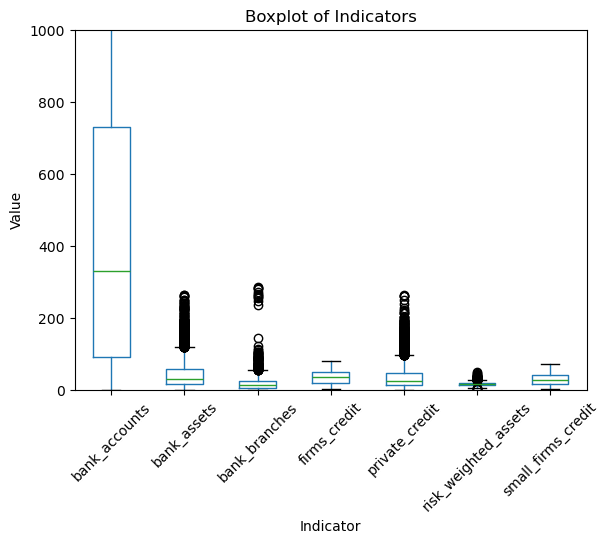

In [71]:
import matplotlib.pyplot as plt

# Create a boxplot using matplotlib
plt.figure(figsize=(12, 8))
gfdd_long.boxplot(column='value', by='indicator', grid=False)
plt.ylim(0, 1e3)
plt.title('Boxplot of Indicators')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Indicator')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.show()

**Figure 10.4 Box and whisker plot for our indicators of interest**

You can repeat the process for the indicators on bank stability by copying the above code and adding indicator variable names accordingly.

## Python Walkthrough 10.3

**Tabulating and visualizing time trends**

In this walk-through we will use the indicators for ‘Deposit money banks’ assets to GDP (%)’ and ‘Bank accounts per 1,000 adults’ as examples (`bank_assets` and `bank_accounts` respectively).

Obtaining the average indicator value for each year and region is straightforward using the `group_by` and `agg` functions, but again we have to select the relevant years (using `.query`) and remove any observations that have a missing value for the indicator being analysed (using `dropna`). We save the final output as `deposit_region`.


In [72]:
deposit_region = (
    gfdd.rename(columns=dict_of_new_names)
    .query("Year > 1999 & Year < 2015")
    .dropna(subset=["bank_assets"])
    .groupby(["Year", "Region"])["bank_assets"]
    .agg(["mean", "count"])
)
deposit_region

mean  count
Year Region                                      
2000 East Asia & Pacific         67.557537     25
     Europe & Central Asia       58.608195     45
     Latin America & Caribbean   46.928321     33
     Middle East & North Africa  60.920046     17
     North America               68.464945      2
...                                    ...    ...
2014 Latin America & Caribbean   57.331511     31
     Middle East & North Africa  75.129953     18
     North America               60.282820      1
     South Asia                  45.498802      8
     Sub-Saharan Africa          29.011847     38

[105 rows x 2 columns]

At this stage the summary data is stored in long format. This format is useful for plotting the data, but to produce the required table (with `Region` as the column variable and `Year` as the row variable), we need to reshape the data into wide format. While we previously used `melt` to move from wide to long, we can use the `pivot` function to achieve the opposite and transform the data from long to wide.

There is a short-cut to `pivot` though: if we only wish to move one variable from a row to a column (and it is part of the index), we can simply use the `.unstack` method:

In [73]:
deposit_region.unstack()

mean                                                  \
Region East Asia & Pacific Europe & Central Asia Latin America & Caribbean   
Year                                                                         
2000             67.557537             58.608195                 46.928321   
2001             67.245847             58.096271                 48.799121   
2002             62.317274             58.667192                 49.103766   
2003             61.236189             60.465442                 48.253112   
2004             60.621324             62.510551                 46.690875   
2005             62.691213             67.640136                 47.277459   
2006             63.319616             73.501307                 47.173601   
2007             64.103156             79.041729                 48.883928   
2008             68.479393             85.709957                 51.875900   
2009             74.951694             92.899973                 55.291540   
2010             75.563454             91.179560                 54.295021   
2011             75.972785             90.080754                 54.386018   
2012             75.109313             89.882284                 55.865148   
2013             79.249328             88.833299                 56.437788   
2014             86.657043             87.061403                 57.331511   

                                                                               \
Region Middle East & North Africa North America South Asia Sub-Saharan Africa   
Year                                                                            
2000                    60.920046     68.464945  28.117836          20.643030   
2001                    62.508313     83.097380  29.391711          20.530323   
2002                    61.924345     94.569720  32.060113          20.500727   
2003                    59.386665     92.078475  33.148744          21.425730   
2004                    57.018716     91.043525  36.022256          20.986100   
2005                    56.144002     94.113530  38.773546          21.480451   
2006                    56.313520    100.841875  34.776328          22.123007   
2007                    55.711586    101.979305  37.704743          22.778664   
2008                    57.938661    104.458085  41.531408          24.382722   
2009                    65.274277     66.734920  43.880175          26.318474   
2010                    64.119124     60.497590  45.363690          26.154682   
2011                    65.473409     59.338070  45.629445          26.944692   
2012                    65.359516     58.287330  45.792968          27.447431   
2013                    66.467436     58.079990  46.435363          28.392471   
2014                    75.129953     60.282820  45.498802          29.011847   

                     count                                                  \
Region East Asia & Pacific Europe & Central Asia Latin America & Caribbean   
Year                                                                         
2000                    25                    45                        33   
2001                    25                    46                        33   
2002                    26                    47                        33   
2003                    26                    47                        33   
2004                    26                    47                        33   
2005                    25                    46                        33   
2006                    25                    47                        33   
2007                    25                    46                        33   
2008                    25                    46                        33   
2009                    25                    44                        33   
2010                    25                    46                        32   
2011                    23                    46                  

Note how we get two sub-tables: one for mean, and one for count.

At this point you could just print or view the data, however using one of many **pandas** export functions produces output that is visually easier to read and can be copied and pasted into your analysis document. Here are some examples with just the first few rows and just the first few columns:

In [74]:
# to markdown, the popular text format
print(deposit_region.iloc[:5, :3].to_markdown())

|                                      |    mean |   count |
|:-------------------------------------|--------:|--------:|
| (2000, 'East Asia & Pacific')        | 67.5575 |      25 |
| (2000, 'Europe & Central Asia')      | 58.6082 |      45 |
| (2000, 'Latin America & Caribbean')  | 46.9283 |      33 |
| (2000, 'Middle East & North Africa') | 60.92   |      17 |
| (2000, 'North America')              | 68.4649 |       2 |


In [75]:
# to latex, for writing papers
print(deposit_region.iloc[:5, :3].style.to_latex())

\begin{tabular}{llrr}
 &  & mean & count \\
Year & Region &  &  \\
\multirow[c]{5}{*}{2000} & East Asia & Pacific & 67.557537 & 25 \\
 & Europe & Central Asia & 58.608195 & 45 \\
 & Latin America & Caribbean & 46.928321 & 33 \\
 & Middle East & North Africa & 60.920046 & 17 \\
 & North America & 68.464945 & 2 \\
\end{tabular}



In [76]:
# to html, for the web
print(deposit_region.iloc[:5, :3].to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>mean</th>
      <th>count</th>
    </tr>
    <tr>
      <th>Year</th>
      <th>Region</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">2000</th>
      <th>East Asia &amp; Pacific</th>
      <td>67.557537</td>
      <td>25</td>
    </tr>
    <tr>
      <th>Europe &amp; Central Asia</th>
      <td>58.608195</td>
      <td>45</td>
    </tr>
    <tr>
      <th>Latin America &amp; Caribbean</th>
      <td>46.928321</td>
      <td>33</td>
    </tr>
    <tr>
      <th>Middle East &amp; North Africa</th>
      <td>60.920046</td>
      <td>17</td>
    </tr>
    <tr>
      <th>North America</th>
      <td>68.464945</td>
      <td>2</td>
    </tr>
  </tbody>
</table>


We can use **lets-plot** to plot a line chart using the long format data (`deposit_region`), with year on the horizontal axis. We specify `color = "Region"`.

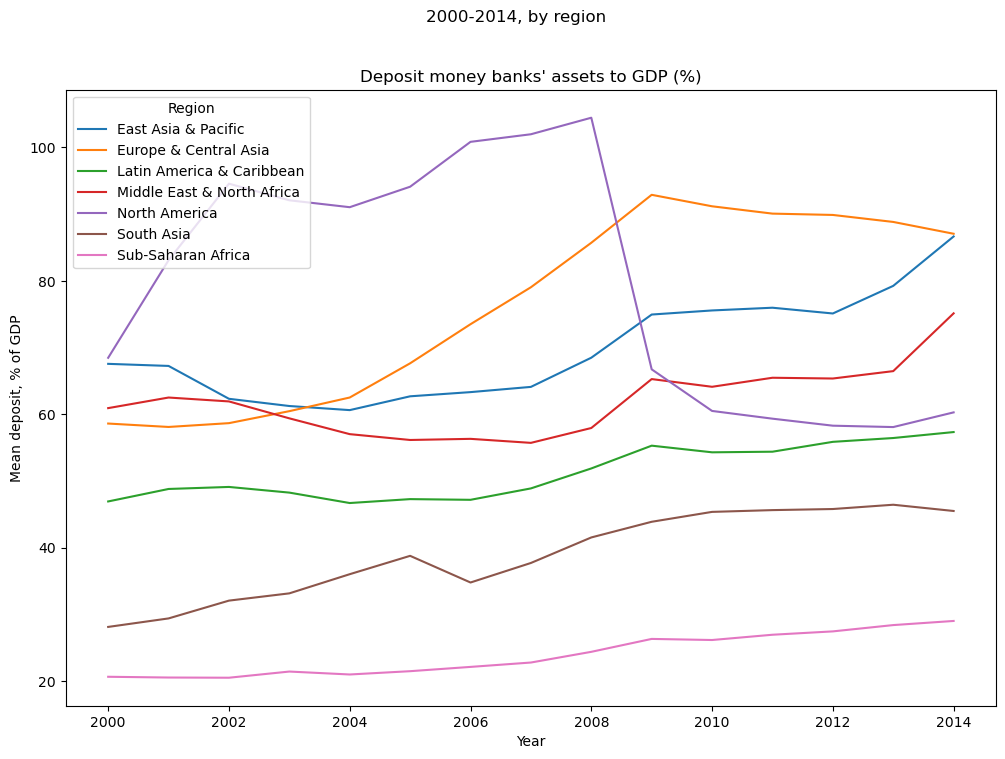

In [77]:
import matplotlib.pyplot as plt

# Reset the index to use 'Year' and 'Region' as columns
deposit_region_reset = deposit_region.reset_index()

# Create a line plot using matplotlib
plt.figure(figsize=(12, 8))
for region in deposit_region_reset['Region'].unique():
    region_data = deposit_region_reset[deposit_region_reset['Region'] == region]
    plt.plot(region_data['Year'], region_data['mean'], label=region)

plt.xlabel('Year')
plt.ylabel('Mean deposit, % of GDP')
plt.title("Deposit money banks' assets to GDP (%)")
plt.suptitle("2000-2014, by region")
plt.legend(title='Region')
plt.show()

**Figure 10.5 Line chart of ‘Deposit money banks’ assets to GDP (%)’, 2000–2014, by region.**

The process can be repeated for income group rather than region.

In [78]:
deposit_income = (
    gfdd_new_names.query("Year > 1999")
    .dropna(subset=["bank_assets"])
    .groupby(["Year", "Income Group"])["bank_assets"]
    .agg(["mean", "count"])
)

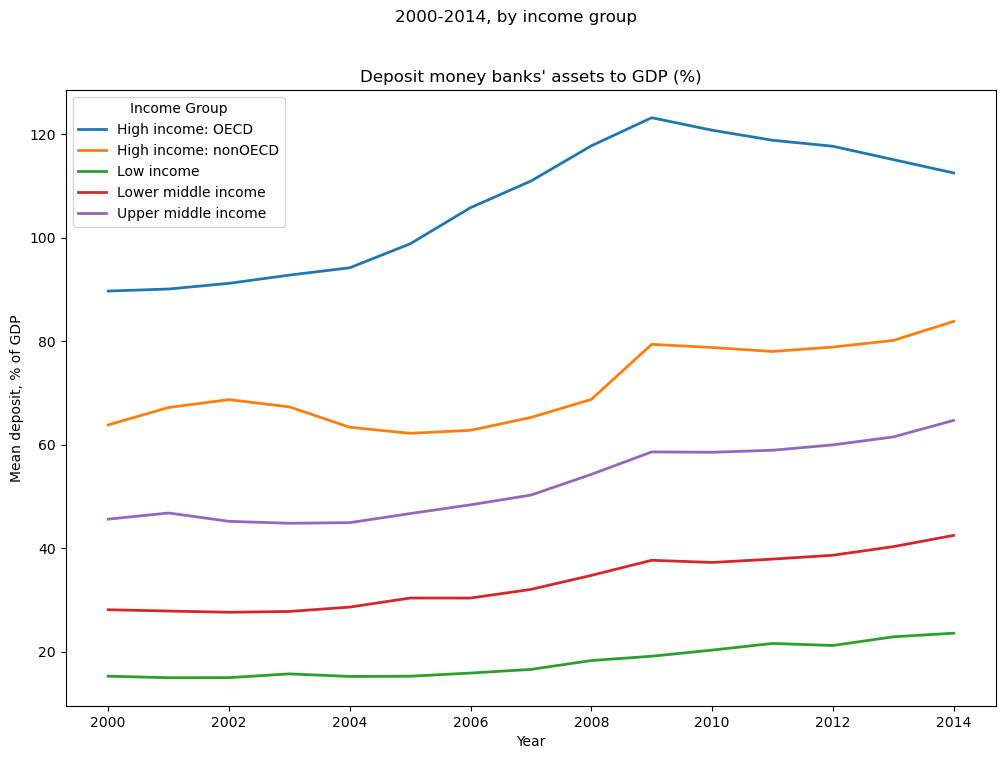

In [79]:
import matplotlib.pyplot as plt

# Reset the index to use 'Year' and 'Income Group' as columns
deposit_income_reset = deposit_income.reset_index()

# Create a line plot using matplotlib
plt.figure(figsize=(12, 8))
for income_group in deposit_income_reset['Income Group'].unique():
    income_group_data = deposit_income_reset[deposit_income_reset['Income Group'] == income_group]
    plt.plot(income_group_data['Year'], income_group_data['mean'], label=income_group, linewidth=2)

plt.xlabel('Year')
plt.ylabel('Mean deposit, % of GDP')
plt.title("Deposit money banks' assets to GDP (%)")
plt.suptitle("2000-2014, by income group")
plt.legend(title='Income Group')
plt.show()

**Figure 10.6 Line chart of ‘Deposit money banks’ assets to GDP (%)’, 2000–2014, by income group.**

You can repeat the process for the indicator 'Bank accounts per 1,000 adults' by replacing the variable name `bank_assets` with `bank_accounts` in the above code, again by region and then by income group.

## Python Walkthrough 10.4

**Creating weighted averages**



As we only require the weighted averages for the years 2004–2014, we will create a new dataframe (called `weighted_gfdd`) to save our results in. The weights are required for each country within each region for each year, but only if there is a value for the `GFDD.AI.01` (`bank_accounts`) indicator, so we:
 - filter results by years of interest using `.query`
 - select only columns of interest using `.loc`
 - drop any invalid entries for `bank_accounts` using `.dropna`

With our new dataframe, we group by year and then region (using a `.groupby`) and then generate the weight for each country by dividing the population of each country by the sum of populations of all countries within a region (and year). To return the results in the same shape (index) as the data we began with, we use the `.transform` method. Remember:

- Use `.agg` when using a groupby, but you want your groups to become the new index (here, this would give a year-region index)
- Use `.transform` when using a groupby, but you want to retain your original index (here, numbered entries)
- Use `.apply` when using a groupby, but you want to perform operations that will leave neither the original index nor an index of groups

In [80]:
gfdd_weighted = (
    gfdd_new_names.query("Year > 2003 & Year < 2015")
    .loc[:, ["Year", "Country", "Region", "bank_accounts", "SP.POP.TOTL"]]
    .dropna(subset=["bank_accounts"])
)

gfdd_weighted["weight"] = gfdd_weighted.groupby(["Year", "Region"])[
    "SP.POP.TOTL"
].transform(lambda x: x / x.sum())

gfdd_weighted

,Year,Country,Region,bank_accounts,SP.POP.TOTL,weight
48,2008,Afghanistan,South Asia,38.021832,27000000.0,0.017563
49,2009,Afghanistan,South Asia,90.909562,27000000.0,0.077729
50,2010,Afghanistan,South Asia,109.722130,28000000.0,0.074594
51,2011,Afghanistan,South Asia,145.330790,29000000.0,0.083005
52,2012,Afghanistan,South Asia,174.633520,30000000.0,0.080997
...,...,...,...,...,...,...
11325,2010,Zimbabwe,Sub-Saharan Africa,161.508630,14000000.0,0.020834
11326,2011,Zimbabwe,Sub-Saharan Africa,79.569343,14000000.0,0.020393
11327,2012,Zimbabwe,Sub-Saharan Africa,83.730240,15000000.0,0.022773
11328,2013,Zimbabwe,Sub-Saharan Africa,80.160849,15000000.0,0.026333


Of course we want to check that this actually works as weight! If it does, then summing over each year-region will produce a value of unity. Let's see:

In [81]:
gfdd_weighted.groupby(["Year", "Region"])["weight"].sum()

Year  Region                    
2004  East Asia & Pacific           1.0
      Europe & Central Asia         1.0
      Latin America & Caribbean     1.0
      Middle East & North Africa    1.0
      South Asia                    1.0
                                   ... 
2014  Europe & Central Asia         1.0
      Latin America & Caribbean     1.0
      Middle East & North Africa    1.0
      South Asia                    1.0
      Sub-Saharan Africa            1.0
Name: weight, Length: 66, dtype: float64

This is correct, so we can proceed to calculate the required weighted indicator values by year and region. We start by creating a new variable with the weighted indicator value (`bank_accounts_weighted`), and then sum up the weighted indicator values by year and region. Recall that when calculating the weighted average, you sum all of the weighted observations rather than taking the mean (which would calculate the simple average instead).

In [82]:
(
    gfdd_weighted.assign(
        bank_accounts_weighted=lambda x: x["bank_accounts"] * x["weight"]
    )
    .groupby(["Year", "Region"])
    .sum()
    .round(2)["bank_accounts_weighted"]
)

Year  Region                    
2004  East Asia & Pacific            253.86
      Europe & Central Asia          637.40
      Latin America & Caribbean      504.48
      Middle East & North Africa     301.03
      South Asia                     529.82
                                     ...   
2014  Europe & Central Asia         1059.82
      Latin America & Caribbean      780.49
      Middle East & North Africa     524.85
      South Asia                     411.35
      Sub-Saharan Africa             350.80
Name: bank_accounts_weighted, Length: 66, dtype: float64

As ever, you can change this table by unstacking it, or just export it like this.

## Python Walkthrough 10.5

**Dealing with extreme values**

In this example we use ‘Bank accounts per 1,000 adults’ (`bank_accounts`). The 95th and 5th percentiles can be obtained using the quantiles function. We save the output into a dataframe so we can refer to the values in later calculations.


In [83]:
q_5_95 = (
    gfdd_new_names.query("Year == 2010")
    .dropna(subset=["bank_accounts"])["bank_accounts"]
    .quantile([0.05, 0.95])
)
q_5_95

0.05      27.593772
0.95    1604.688000
Name: bank_accounts, dtype: float64

We can compare the value of the indicator with these upper and lower bounds using the `np.where` function from numerical library **numpy**. The way `np.where` works is that it has the following syntax:

```text
np.where(condition, value if condition is true, value if condition is false)
```

But the beauty of `np.where` is that we need not just pass it single values in either of its three arguments: we can pass vectors to all of its arguments, creating a vector-valued return column. 

In the below, we make use of `np.where` to first replace all values below the 5th percentile with the value for the 5th percentile, and then to replace all values above the 95th percentile with the value for the 95th percentile.

Gotcha warning! The index values for retrieving data from `q_5_95` are of integer type (as opposed to strings). Another gotcha! Because we refer to "`bank_accounts`" multiple times, we need to define it first in a separate step (or, alternatively use *lambda expressions*).

In [84]:
gfdd_2010 = gfdd_new_names.query("Year == 2010").dropna(subset=["bank_accounts"])

bank_2010 = gfdd_2010.assign(
    bank_accounts=np.where(
        gfdd_2010["bank_accounts"] < q_5_95[0.05],
        q_5_95[0.05],
        np.where(
            gfdd_2010["bank_accounts"] > q_5_95[0.95],
            q_5_95[0.95],
            gfdd_2010["bank_accounts"],
        ),
    )
)

Next we can obtain our summary statistics and print out the ‘Winsorized’ averages (use `gfdd_2010` to see the original averages).

In [85]:
bank_2010.groupby("Income Group").agg(avg_2010=("bank_accounts", "mean")).round(2)

,avg_2010
Income Group,
High income: OECD,1356.47
High income: nonOECD,916.90
Low income,123.06
Lower middle income,422.65
Upper middle income,635.71


## Python Walkthrough 10.6

**Calculating confidence intervals**

In Python walkthroughs 3.6 and 8.10 we used the t-test function from the **pingouin** package to obtain differences in means and confidence intervals (CIs) for two groups of data. Here we need to obtain these statistics for the `GFDD.SI.05` indicator (renamed as `risk_weighted_assets`) between 2007 and 2014 for each region.

As we need to find the confidence intervals for a number of regions, we can use a *vectorised operation* to perform the same calculation for each region in turn. For this, we do need to reshape our data, however. We want to make it so that the 2007 and 2014 values of risk weighted assets appear as columns while regions (and countries) are columns. To do this, we're going to first select both the values and variables we're interested in using the `.loc` command. We'll then use `pivot` to re-order the data into the shape we want.


In [86]:
rwa_07_14 = gfdd_new_names.loc[
    gfdd_new_names["Year"].isin([2007, 2014]),
    ["Year", "Region", "Country", "risk_weighted_assets"],
].pivot(index=["Region", "Country"], columns=["Year"], values=["risk_weighted_assets"])

rwa_07_14

risk_weighted_assets      
Year                                                  2007  2014
Region              Country                                     
East Asia & Pacific Australia                         10.1  12.4
                    Brunei Darussalam                  NaN  21.0
                    Cambodia                           NaN   NaN
                    China                              8.4  13.2
                    Fiji                               NaN  14.7
...                                                    ...   ...
Sub-Saharan Africa  Tanzania                           NaN  17.0
                    Togo                               NaN   NaN
                    Uganda                            19.3  22.2
                    Zambia                             NaN   NaN
                    Zimbabwe                           NaN   NaN

[206 rows x 2 columns]

Now we have the shape, but we've unwittingly created quite a complex structure, especially of our index. To access columns in a hierarchical or multindex index, use a tuple (tuples have curvy brackets). You can see the precise name of the columns by running `.columns` like this:

In [87]:
rwa_07_14.columns

MultiIndex([('risk_weighted_assets', 2007),
            ('risk_weighted_assets', 2014)],
           names=[None, 'Year'])

Now, we want to get a t-test for each region. We'll use the **pingouin** package for the ttest, we'll groupby by region, and we'll use the apply function, which allows us to run functions that combine different columns.

In [88]:
rwa_07_14_ttest = rwa_07_14.groupby("Region").apply(
    lambda row: pg.ttest(
        row[("risk_weighted_assets", 2007)], row[("risk_weighted_assets", 2014)]
    )
)
rwa_07_14_ttest

/Users/armandhubler/Documents/Python/kaggle_regression_competition/.conda/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
Region,,,,,,,,,
East Asia & Pacific,T-test,-0.996595,21.376682,two-sided,0.330109,"[-5.75, 2.02]",0.394260,0.519,0.165007
Europe & Central Asia,T-test,-2.697072,76.344458,two-sided,0.008604,"[-4.75, -0.71]",0.574108,5.049,0.763601
Latin America & Caribbean,T-test,-0.481507,32.000000,two-sided,0.633433,"[-1.85, 1.14]",0.165155,0.36,0.075360
Middle East & North Africa,T-test,-0.040157,15.165713,two-sided,0.968492,"[-3.06, 2.95]",0.017512,0.373,0.050194
North America,T-test,-0.497519,2.000000,two-sided,0.668138,"[-4.82, 3.82]",0.497519,0.662,0.061395
South Asia,T-test,-1.918656,4.000000,two-sided,0.127469,"[-7.49, 1.37]",0.959328,1.247,0.155595
Sub-Saharan Africa,T-test,-0.683895,27.522410,two-sided,0.499760,"[-5.17, 2.58]",0.240930,0.396,0.103905


Let's explode out the confidence interval into two separate columns (it's one column of lists of two entries here). We'll also add in some other stats based on the t-test confidence intervals; the mean, and the width. Note that the mean is just the `.mean` across each row (`axis=1`), and the difference can be computed using `.diff` and then taking the one valid entry by using `dropna`.

To assemble all of this, we're going to *concatenate* multiple dataframes using `pd.concat`. The syntax of this command is `pd.concat([list of dataframes], axis=<axis you want to stick dataframes together by)`. In the below, the two dataframes in our list are the original `rwa_07_14_ttest` and a new, second dataframe that we create in line that has the confidence intervals as its values and two columns, "upper" and "lower".

Further below, when we wish to add in means and widths, we can do this by just declaring a new column (eg by writing `rwa_07_14_ttest["mean"] = ...`) and then applying a function to the two columns of interest.

In [89]:
rwa_07_14_ttest = pd.concat(
    [
        rwa_07_14_ttest,
        pd.DataFrame(
            rwa_07_14_ttest["CI95%"].tolist(),
            columns=["lower", "upper"],
            index=rwa_07_14_ttest.index,
        ),
    ],
    axis=1,
)
rwa_07_14_ttest["mean"] = rwa_07_14_ttest[["lower", "upper"]].mean(axis=1)
rwa_07_14_ttest["width"] = (
    rwa_07_14_ttest[["lower", "upper"]].diff(axis=1).dropna(axis=1) / 2
)
rwa_07_14_ttest

,,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power,lower,upper,mean,width
Region,,,,,,,,,,,,,
East Asia & Pacific,T-test,-0.996595,21.376682,two-sided,0.330109,"[-5.75, 2.02]",0.394260,0.519,0.165007,-5.75,2.02,-1.865,3.885
Europe & Central Asia,T-test,-2.697072,76.344458,two-sided,0.008604,"[-4.75, -0.71]",0.574108,5.049,0.763601,-4.75,-0.71,-2.730,2.020
Latin America & Caribbean,T-test,-0.481507,32.000000,two-sided,0.633433,"[-1.85, 1.14]",0.165155,0.36,0.075360,-1.85,1.14,-0.355,1.495
Middle East & North Africa,T-test,-0.040157,15.165713,two-sided,0.968492,"[-3.06, 2.95]",0.017512,0.373,0.050194,-3.06,2.95,-0.055,3.005
North America,T-test,-0.497519,2.000000,two-sided,0.668138,"[-4.82, 3.82]",0.497519,0.662,0.061395,-4.82,3.82,-0.500,4.320
South Asia,T-test,-1.918656,4.000000,two-sided,0.127469,"[-7.49, 1.37]",0.959328,1.247,0.155595,-7.49,1.37,-3.060,4.430
Sub-Saharan Africa,T-test,-0.683895,27.522410,two-sided,0.499760,"[-5.17, 2.58]",0.240930,0.396,0.103905,-5.17,2.58,-1.295,3.875


The same process can be repeated for income groups and for the indicator "GFDD.SI.01" (Bank Z-score).

## Python Walkthrough 10.7

**Plotting column charts with error bars**

Again we use the `GFDD.SI.05` indicator (`risk_weighted_assets`) for Region as an example. You can repeat the following steps by region and for the `risk_weighted_assets` variable by changing the variable name(s) in Python walkthrough 10.6 accordingly, then running the code below.

In [90]:
rwa_07_14_ttest.reset_index(inplace=True)

In [91]:
rwa_07_14_ttest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       7 non-null      object 
 1   level_1      7 non-null      object 
 2   T            7 non-null      float64
 3   dof          7 non-null      float64
 4   alternative  7 non-null      object 
 5   p-val        7 non-null      float64
 6   CI95%        7 non-null      object 
 7   cohen-d      7 non-null      float64
 8   BF10         7 non-null      object 
 9   power        7 non-null      float64
 10  lower        7 non-null      float64
 11  upper        7 non-null      float64
 12  mean         7 non-null      float64
 13  width        7 non-null      float64
dtypes: float64(9), object(5)
memory usage: 916.0+ bytes


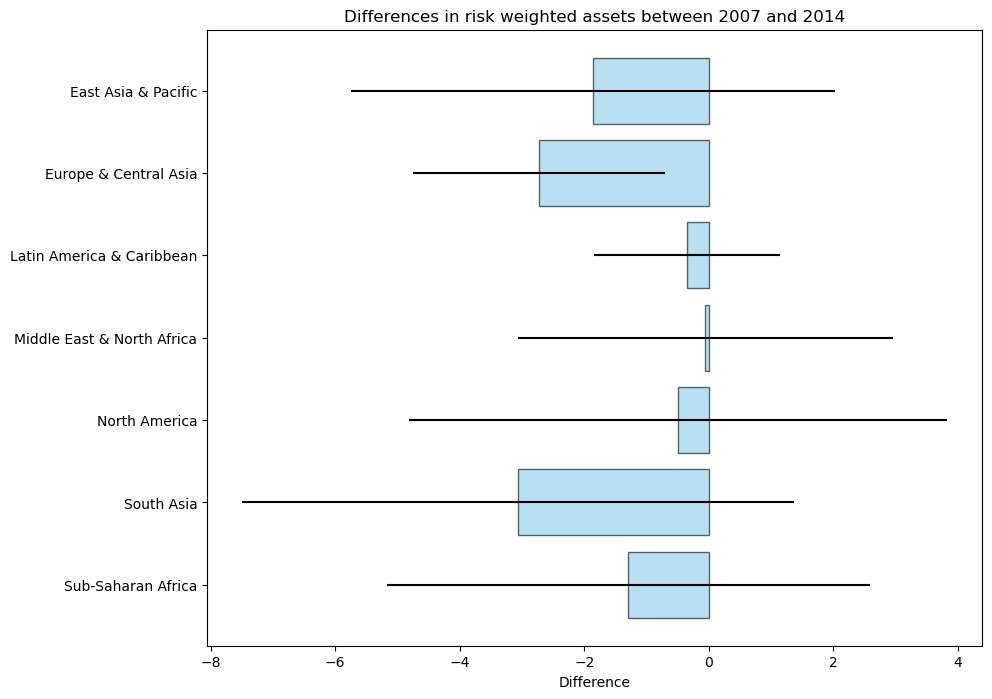

In [92]:
# Drop rows with NaN values
rwa_07_14_ttest_reset = rwa_07_14_ttest.dropna(subset=['mean', 'lower', 'upper'])

# Extract the necessary data
regions = rwa_07_14_ttest_reset['Region']
means = rwa_07_14_ttest_reset['mean']
lower_bounds = rwa_07_14_ttest_reset['lower']
upper_bounds = rwa_07_14_ttest_reset['upper']
errors = [means - lower_bounds, upper_bounds - means]

# Create the bar chart with error bars
plt.figure(figsize=(10, 8))
plt.barh(regions, means, xerr=errors, color='skyblue', edgecolor='black', alpha=0.6)
plt.xlabel('Difference')
plt.title('Differences in risk weighted assets between 2007 and 2014')
plt.gca().invert_yaxis()  # Invert y-axis to match coord_flip() in ggplot
plt.show()

**Figure 10.7 Column chart with error bars for ‘Bank regulatory capital to risk-weighted assets (%)’ (`risk_weighted_assets`).**

This chapter used the following packages